# hypo3 - 노령화 지수가 높은 지역일수록, 노인의 교육시설이 많을 것이다

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import googlemaps
import seaborn as sns
from matplotlib import rc 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

## edu

In [18]:
edu = pd.read_csv('./data/KC_ODSN_CNTEDU_FCLTY_LIST_2023.csv')
edu.head()

,ESNTL_ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,...,BULD_MANAGE_CD,TEL_NO,ZIP_NO,HMPG_URL,FCLTY_LA,FCLTY_LO,ORIGIN_NM,ADIT_DC,UPDT_DT,REGIST_DT
0,KCOEFPO23N000000001,문화시설,문화시설_교육_시니어,전남대학교용봉동캠퍼스평생교육원,29,광주광역시,29170,북구,2917010700,NaN,...,2917010700103000000024363,NaN,61186.0,NaN,35.179328,126.907701,공공데이터,-,20231231,20231231
1,KCOEFPO23N000000002,문화시설,문화시설_교육_시니어,고려대학교평생교육원,11,서울특별시,11290,성북구,1129013500,NaN,...,1129012500100010002039525,NaN,2841.0,NaN,37.590228,127.035858,공공데이터,-,20231231,20231231
2,KCOEFPO23N000000003,문화시설,문화시설_교육_시니어,서울여자대학교평생교육원,11,서울특별시,11350,노원구,1135010300,NaN,...,1135010300101260000014437,NaN,1797.0,NaN,37.627234,127.090297,공공데이터,-,20231231,20231231
3,KCOEFPO23N000000004,문화시설,문화시설_교육_시니어,광주가톨릭평생교육원본관,29,광주광역시,29140,서구,2914011800,NaN,...,2914011800109970001008995,NaN,61995.0,NaN,35.150379,126.868303,공공데이터,-,20231231,20231231
4,KCOEFPO23N000000005,문화시설,문화시설_교육_시니어,세종대학교평생교육원,11,서울특별시,11215,광진구,1121510900,NaN,...,1121510900100980000018572,NaN,5006.0,NaN,37.553244,127.073381,공공데이터,-,20231231,20231231


In [19]:
edu.drop(columns=['ESNTL_ID', 'CTPRVN_CD', 'SIGNGU_CD', 'LEGALDONG_CD', 'ROAD_NM_CD' , 'TEL_NO', 'ZIP_NO',
                        'LEGALDONG_NM', 'ADDR_ENG_NM', 'ADSTRD_CD', 'BULD_NM', 'BULD_MANAGE_CD', 'HMPG_URL', 'ORIGIN_NM', 'ADIT_DC',
                        'UPDT_DT', 'REGIST_DT'], inplace=True)
edu.reset_index(drop=True, inplace=True)
edu.head()

,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,문화시설,문화시설_교육_시니어,전남대학교용봉동캠퍼스평생교육원,광주광역시,북구,광주광역시 북구 용봉로 77 (용봉동),광주광역시 북구 용봉동 300 전남대학교,35.179328,126.907701
1,문화시설,문화시설_교육_시니어,고려대학교평생교육원,서울특별시,성북구,서울특별시 성북구 안암로 145 (안암동5가),서울특별시 성북구 안암동5가 1-2 고려대학교안암캠퍼스,37.590228,127.035858
2,문화시설,문화시설_교육_시니어,서울여자대학교평생교육원,서울특별시,노원구,서울특별시 노원구 화랑로 621 (공릉동),서울특별시 노원구 공릉동 126 서울여자대학교,37.627234,127.090297
3,문화시설,문화시설_교육_시니어,광주가톨릭평생교육원본관,광주광역시,서구,광주광역시 서구 상무대로 980 (쌍촌동),광주광역시 서구 쌍촌동 997-1,35.150379,126.868303
4,문화시설,문화시설_교육_시니어,세종대학교평생교육원,서울특별시,광진구,서울특별시 광진구 능동로 209 (군자동),서울특별시 광진구 군자동 98 세종대학교,37.553244,127.073381


In [20]:
edu_seoul = edu[edu['CTPRVN_NM'] == '서울특별시']
edu_seoul.reset_index(drop=True, inplace=True)
edu_seoul.head()

,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,문화시설,문화시설_교육_시니어,고려대학교평생교육원,서울특별시,성북구,서울특별시 성북구 안암로 145 (안암동5가),서울특별시 성북구 안암동5가 1-2 고려대학교안암캠퍼스,37.590228,127.035858
1,문화시설,문화시설_교육_시니어,서울여자대학교평생교육원,서울특별시,노원구,서울특별시 노원구 화랑로 621 (공릉동),서울특별시 노원구 공릉동 126 서울여자대학교,37.627234,127.090297
2,문화시설,문화시설_교육_시니어,세종대학교평생교육원,서울특별시,광진구,서울특별시 광진구 능동로 209 (군자동),서울특별시 광진구 군자동 98 세종대학교,37.553244,127.073381
3,문화시설,문화시설_교육_시니어,이화여자대학교평생교육원,서울특별시,서대문구,서울특별시 서대문구 성산로 508 (대신동),서울특별시 서대문구 대신동 33 이화삼성교육관,37.562082,126.943160
4,문화시설,문화시설_교육_시니어,서울과학기술대학교평생교육원,서울특별시,노원구,서울특별시 노원구 공릉로 232 (공릉동),서울특별시 노원구 공릉동 172 서울과학기술대학교,37.630710,127.078560


## old-point

In [21]:
old_point = pd.read_excel('./data/자치구별+노령화지수(추계인구)_20240929181758.xlsx')
old_point.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),합계,남자,여자
1,합계,소계,199.1,171.6,228.2
2,NaN,종로구,267.8,237.3,298
3,NaN,중구,286.5,245.3,329.3
4,NaN,용산구,200.7,172.2,230


In [22]:
old_point.drop(index=[0, 1], columns=["자치구별(1)"], inplace=True)
old_point.columns = ['구별', '노령화지수_합계', '노령화지수_남자', '노령화지수_여자']
old_point.reset_index(drop=True, inplace=True)
old_point.head()

,구별,노령화지수_합계,노령화지수_남자,노령화지수_여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1


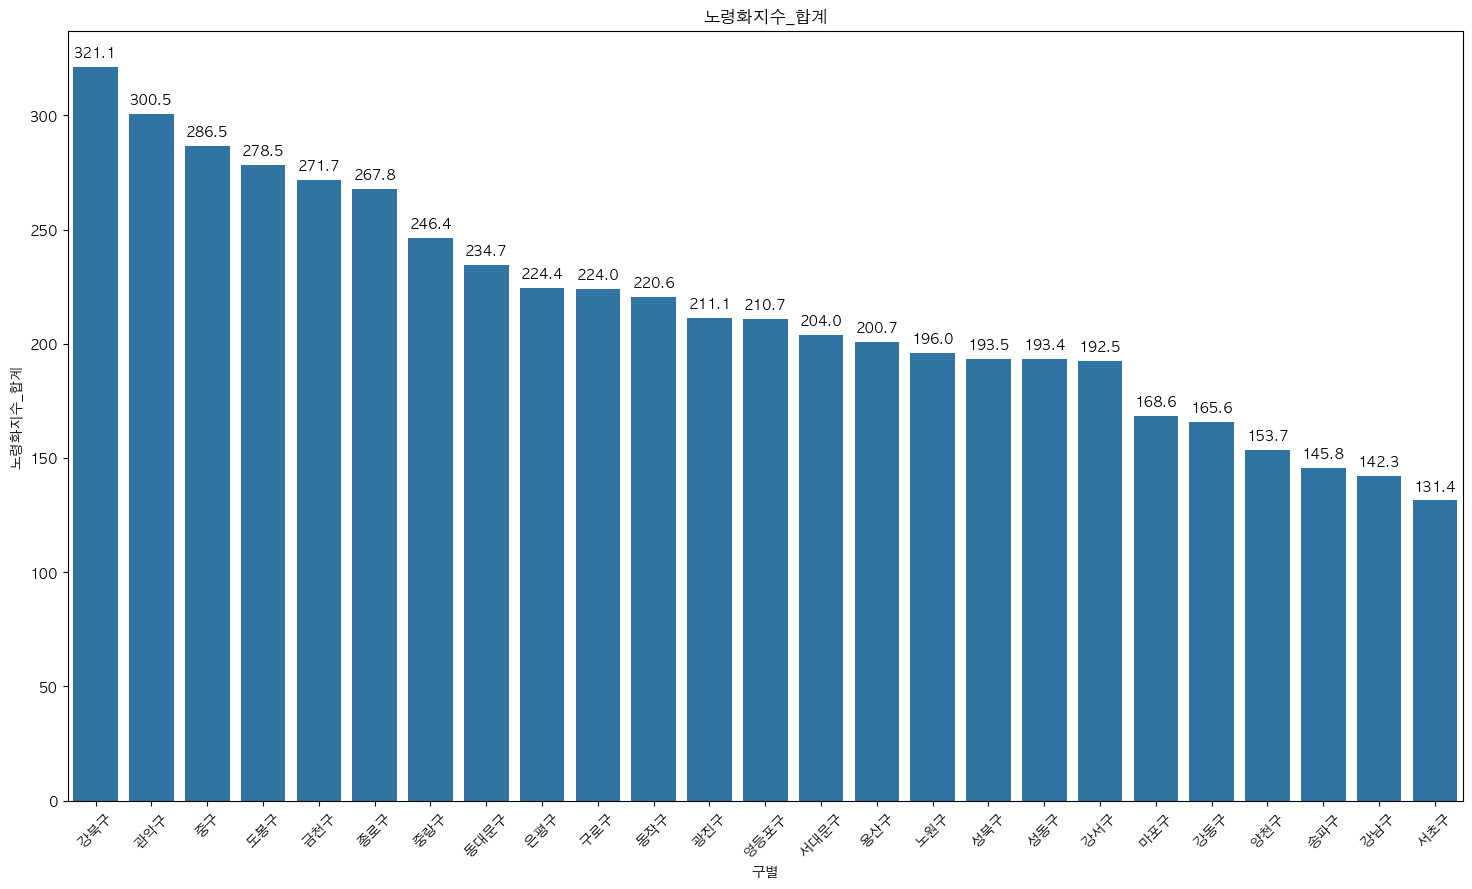

In [25]:
old_point_sorted = old_point.sort_values(by='노령화지수_합계', ascending=False)

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=old_point_sorted, x='구별', y='노령화지수_합계')
plt.title("노령화지수_합계")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.xticks(rotation=45)
plt.show()

In [28]:
edu_seoul['SIGNGU_NM'].value_counts()

SIGNGU_NM
강남구     19
영등포구    16
서초구     16
구로구     15
종로구     14
마포구     10
동대문구     9
성북구      8
관악구      8
송파구      8
성동구      8
노원구      8
중랑구      7
금천구      6
중구       6
강서구      5
강동구      5
용산구      4
은평구      4
서대문구     4
광진구      4
강북구      4
동작구      3
양천구      2
도봉구      2
Name: count, dtype: int64

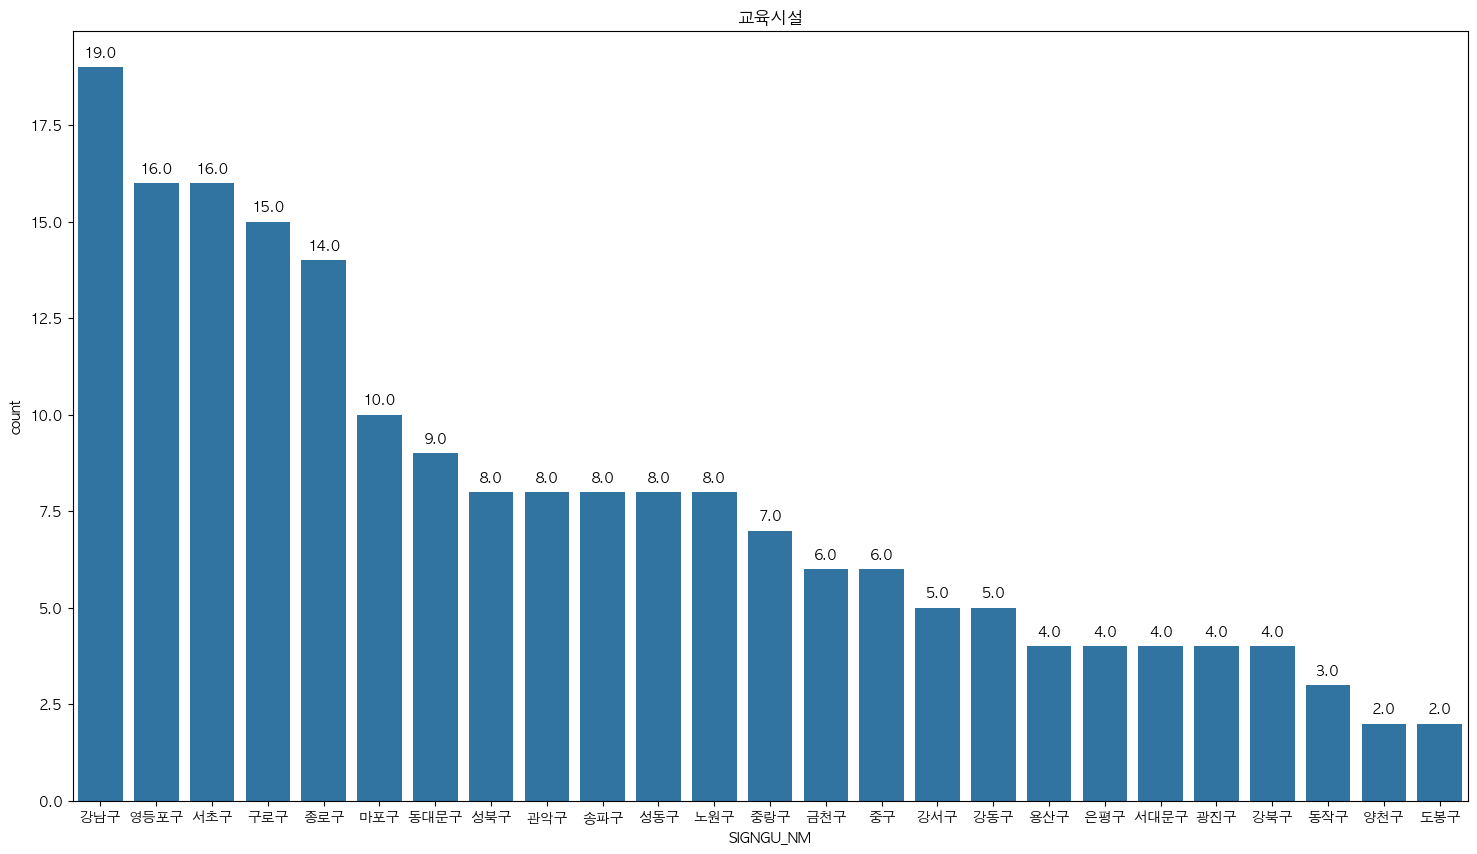

In [35]:
# SIGNGU_NM의 카테고리별 개수를 계산하고 오름차순으로 정렬
order = edu_seoul['SIGNGU_NM'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(18, 10))
ax = sns.countplot(data=edu_seoul, x='SIGNGU_NM', order=order)

# 값 레이블 추가
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("교육시설")
plt.show()